<a href="https://colab.research.google.com/github/mahmoud2571587/Titanic_ship/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Titanic Problem</center></h1>


**Import Libraries**

In [124]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

Mount Drive

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read Data**

In [188]:
train = pd.read_csv('/content/drive/My Drive/Kaggle/Titanic/Dataset/train.csv')
test  = pd.read_csv('/content/drive/My Drive/Kaggle/Titanic/Dataset/test.csv')

**<h3> Explore Data </h3>**

In [127]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


pclass feature need to convert datatype from int64 to string

In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [130]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [131]:
train.describe(include=['O']).T

,count,unique,top,freq
Name,891,891,"Adams, Mr. John",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


there is missing value in :- 
1.   Cabin    686
2.   Age      177
3.   Embarked 2

In [132]:
# EXplore Missing Values
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [133]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

**<h4>Visualize data </h4>**

In [134]:
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived' , 'Sex' , 'Pclass' , 'Embarked']]

sibling , parch , Fare ==> need to log transformation

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


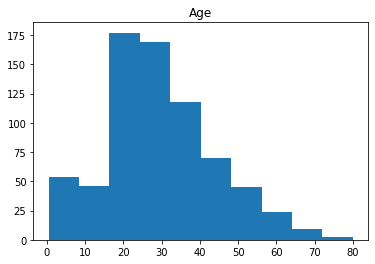

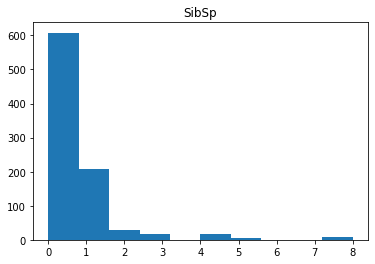

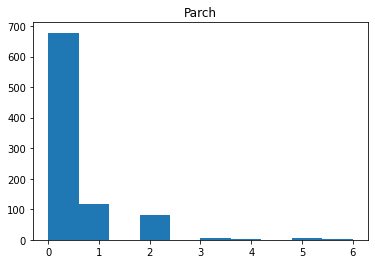

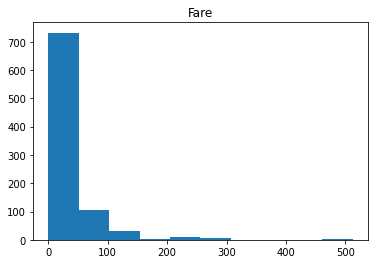

In [135]:
for col in df_num.columns:
  plt.hist(df_num[col])
  plt.title(col)
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


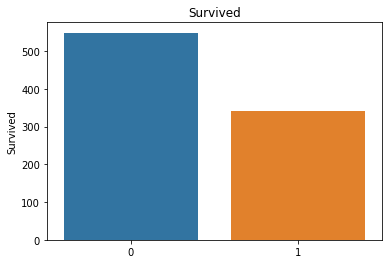

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


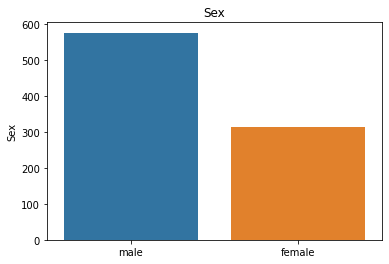

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


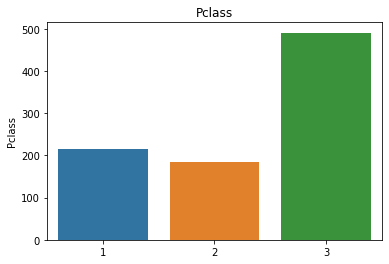

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


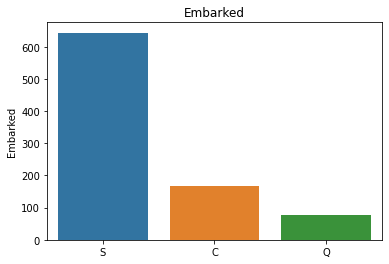

In [136]:
for col in df_cat.columns:
  sns.barplot( df_cat[col].value_counts().index,df_cat[col].value_counts() ).set_title(col)
  plt.show()

    

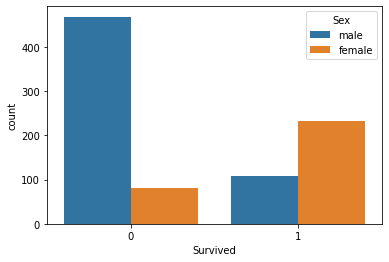

In [137]:
sns.countplot(x="Survived" , hue="Sex" , data=train)

In [138]:
train[['Sex' , 'Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


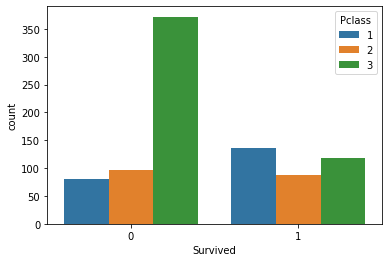

In [139]:
sns.countplot(x="Survived" , hue = "Pclass" , data=train)

In [140]:
train[['Survived' , 'Pclass']].groupby(['Pclass']).mean().sort_values(by='Survived' , ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [141]:
pd.pivot_table(train,values="Name" , index=["Pclass","Sex"] , columns="Survived",aggfunc="count" )

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

In [142]:
train[['Survived' , 'Sex' , 'Pclass']].groupby(['Pclass' , 'Sex']).mean().sort_values(by='Survived' , ascending=False)

,,Survived
Pclass,Sex,
1,female,0.968085
2,female,0.921053
3,female,0.500000
1,male,0.368852
2,male,0.157407
3,male,0.135447


most people died board from port 'S'<br>
most people survived board from port 'S' also 

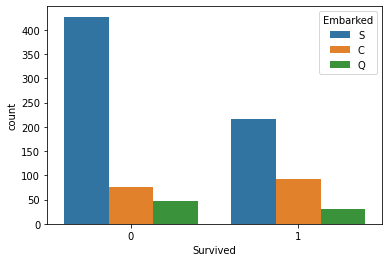

In [143]:
sns.countplot(x="Survived", hue="Embarked",data=train)

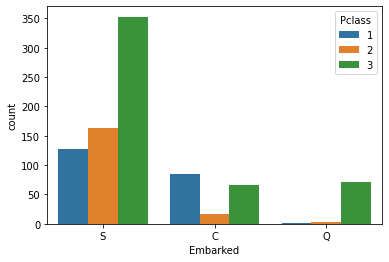

In [144]:
#pd.pivot_table(train,values="Name", index=['Pclass' , 'Embarked'] , columns="Age",aggfunc="count")
sns.countplot(x='Embarked' , hue='Pclass',data=train)

there is correlation between : <br><hr>
Pclass with Fare     ===>  (-55%) <br>
sibSp  with Parch    ===>  (41%) <br>
pclass with Age      ===>  (-37%) <br>
Pclass with Survived ===>  (-34%) <br>
sibSP  with Age      ===>  (-31%> <br>
Fare with Survived   ===>   26% <br>
parch  with Fare    ===> 22% <br>
sibSp  with Fare    ===> 16% <br>



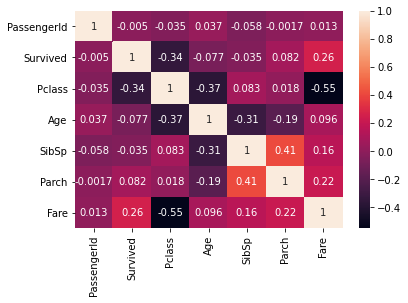

In [145]:
sns.heatmap(train.corr(),annot=True)

Embarked , Age , Pclass , Survived  ====> have strong correlation<br><hr>
then we can say that pclass '1' have most survived <br>
and pclass'1' most of them from Emabrked 'C' <br>
and Emabrked 'C' have greatest average of Age  <br><hr>
so distribution passenger on pclass is depend on Age where class'1' has oldest passengers and pclass '3' has youngest passengers

In [146]:
train[['Embarked' , 'Age' ]].groupby(['Embarked' ]).mean().sort_values(by='Age' , ascending=False)

,Age
Embarked,
C,30.814769
S,29.445397
Q,28.089286


In [147]:
train[['Age' , 'Sex']].groupby(['Sex']).mean().sort_values(by='Age' , ascending=False)

,Age
Sex,
male,30.726645
female,27.915709


In [148]:
train[['SibSp' ,  'Parch','Age']].groupby(['SibSp','Parch']).mean().sort_values(by ='Age' , ascending=False)

Age
SibSp Parch           
1     4      49.666667
      6      43.000000
0     5      40.000000
1     3      39.333333
      5      38.666667
0     0      32.220297
1     0      32.068627
2     0      31.846154
3     0      31.500000
0     1      29.524865
      4      29.000000
1     1      27.064815
0     3      24.000000
2     3      24.000000
0     2      20.993462
1     2      20.465882
2     2      17.250000
3     2      13.000000
5     2      10.200000
2     1       8.357143
4     2       7.333333
      1       6.777778
3     1       4.333333
8     2            NaN

In [149]:
train[['Age' , 'Sex' , 'Pclass']].groupby(['Pclass' , 'Sex']).mean().sort_values(by='Age' , ascending=False)

Age
Pclass Sex              
1      male    41.281386
       female  34.611765
2      male    30.740707
       female  28.722973
3      male    26.507589
       female  21.750000

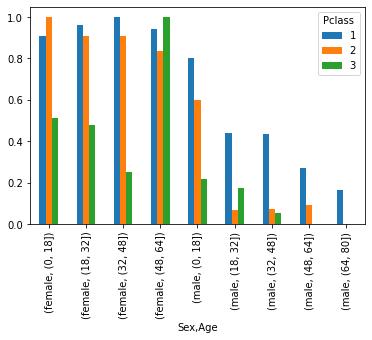

In [150]:
age = pd.cut(train['Age'], [0, 18, 32,48,64,80])
train.pivot_table('Survived', ['Sex', age], 'Pclass').plot.bar()

#Step 2:- preprocessing data 

**Combine train and test**

In [151]:
dataset = pd.concat((train,test) , sort = False).reset_index(drop=True)
dataset = dataset.drop(columns =['Survived'], axis =1 )

In [152]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Fill Missing Values**

fill missing value in Age 

In [153]:
#columns that have missing values :- 
#Cabin ==>  687 , Age ==> 177 , Embarked === > 2
def impute_age(col):
  Age    = col[0]
  Pclass = col[1]
  Sex    = col[2]
  if pd.isnull(Age):
    if Pclass==1:
      if Sex == 'female':
        return 34
      else:
        return 41
    elif Pclass == 2:
      if Sex == 'female':
        return 28
      else:
        return 30
    elif Pclass==3:
      if Sex =='female':
        return 21
      else:
        return 26
  else:
   return Age 



In [154]:
dataset['Age']= dataset[['Age','Pclass' , 'Sex']].apply(impute_age,axis=1)

fill Embarked missing value

In [155]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

Make Feature Engineer on Cabin feature then drop Cabin feature

In [156]:
dataset['Cabin_ch'] = dataset.Cabin.str.extract('([A-Za-z])', expand=False)
dataset.drop('Cabin',axis=1 , inplace=True)
dataset.head()
#dataset['Cabin'][0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_ch
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN


In [157]:
# make intiution on Cabin_ch
dataset['Cabin_ch'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin_ch, dtype: int64

In [158]:
#explore correlation between Fare and Cabin_ch
dataset.pivot_table('Fare' , 'Cabin_ch' , aggfunc='median').sort_values(by='Fare' , ascending=False)

,Fare
Cabin_ch,
C,86.2896
B,82.2667
E,53.1000
D,52.5542
T,35.5000
A,35.0771
G,16.7000
F,13.0000


during Explore Correlation between Cabin_ch and Embarked <br>
foud that there is strong correlatin between Embarked and Cabin_ch where most 'Cabin_ch' from 'S' then 'C' then 'Q' BUT 'Q' is rare<br><hr>
make visualizatin to show this correlation in more details and found that Cabin_ch ('C') most used either in Embarked'S' OR 'C' OR 'Q'

In [159]:
dataset.pivot_table(values='Cabin_ch' , index='Embarked' , aggfunc='count').sort_values(by='Cabin_ch',ascending=False)

,Cabin_ch
Embarked,
S,172
C,118
Q,5


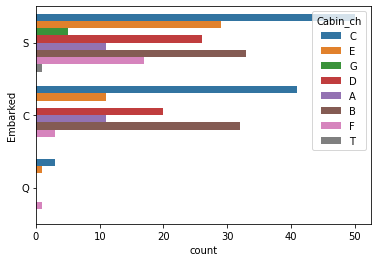

In [160]:
sns.countplot(y='Embarked' , hue='Cabin_ch',data=dataset)

**Fill missing values in Cabin_ch**

In [161]:
dataset['Cabin_ch']= dataset['Cabin_ch'].fillna('C')

In [162]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_ch
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,C
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,C


In [163]:
dataset['Fare']=dataset['Fare'].fillna(dataset['Fare'].median())

In [164]:
dataset.isnull().sum().sort_values(ascending=False)

Cabin_ch       0
Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64

In [165]:
#check for Duplicate values
duplicate = dataset[dataset.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked, Cabin_ch]
Index: []


**<h4>Feature Enginnereing</h4>**

make title from Name 

In [166]:
dataset['Title']= dataset.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [167]:
pd.unique(dataset['Title'])

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [168]:
dataset['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Lady              1
Capt              1
the Countess      1
Sir               1
Dona              1
Jonkheer          1
Don               1
Mme               1
Name: Title, dtype: int64

In [169]:
#train['Title'].replace(['Dr' , 'Rev','Col',''])

In [170]:
#train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived' , ascending=False)

Convert Pclass data type  from number to string

In [171]:
dataset['Pclass'] = dataset['Pclass'].astype('str')

*Drop Features* 

In [172]:
dataset.drop(['PassengerId','Name' ,'Ticket'] , axis =1 , inplace=True)

In [173]:
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_ch,Title
0,3,male,22.0,1,0,7.2500,S,C,Mr
1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,female,26.0,0,0,7.9250,S,C,Miss
3,1,female,35.0,1,0,53.1000,S,C,Mrs
4,3,male,35.0,0,0,8.0500,S,C,Mr


**<h4> Categorical Variables</h4>**



In [174]:
dataset = pd.get_dummies(dataset , drop_first= True).reset_index(drop=True)
dataset.head() 

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Cabin_ch_B,Cabin_ch_C,Cabin_ch_D,Cabin_ch_E,Cabin_ch_F,Cabin_ch_G,Cabin_ch_T,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,22.0,1,0,7.2500,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,35.0,1,0,53.1000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,35.0,0,0,8.0500,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Split Data for Independent and dependent Variables

In [175]:
y=train['Survived']
X = dataset.iloc[:len(y),:]
df_test = dataset.iloc[len(y): , : ]

**<h4> Feature Scaling </h4>**

In [176]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_test = MinMaxScaler()
X=sc_X.fit_transform(X)
df_test=sc_test.fit_transform(df_test)

Split Data to train and test

In [177]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=0)

**<h3>Build Model</h3>**

**Logistic Regression**

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
logReg_pred = logReg.predict(X_test)
#Evalulate Model
logReg_acc_score= round(accuracy_score(y_test,logReg_pred),2)
print('Logistic Regression Score :  ',logReg_acc_score)
## using Cross validation 
cv_logReg = round(cross_val_score(logReg , X , y, cv=5).mean(),2)
print('cross_val_score LogReg :  ',cv_logReg, '\n\n')

Logistic Regression Score :   0.82
cross_val_score LogReg :   0.83 




In [179]:
from sklearn.metrics import  confusion_matrix
logReg_accuracy = confusion_matrix(y_test,logReg_pred)
print(logReg_accuracy)

[[143  25]
 [ 22  78]]


In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logReg_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       168
           1       0.76      0.78      0.77       100

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.82      0.83       268



**K_Nearest Neighbors**

In [198]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
knc_pred = knc.predict(X_test)
# evaluate accuracy 
knc_accuracy = round(accuracy_score(y_test,knc_pred),2)
print('KNeighbors Classifier :    ',knc_accuracy)
## using cross validation
cv_knc = round(cross_val_score(knc,X,y,cv=5).mean(),2)
print('cross_val_score K_Nearest Neighbors :    ',cv_knc , '\n\n')

KNeighbors Classifier :     0.81
cross_val_score K_Nearest Neighbors :     0.82 




**SVM**

In [200]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf' , random_state=0)
svc.fit(X_train , y_train)
svc_pred = svc.predict(X_test)
# evaluate accuracy 
svc_accuracy = round(accuracy_score(y_test,svc_pred),2)
print(svc_accuracy)
## using cross validation
cv_svc = round(cross_val_score(svc,X,y,cv=5).mean(),2)
print('cross_val_score :    ',cv_svc , '\n\n')

0.81
cross_val_score :     0.82 




**Naive Bayes**

In [209]:
from sklearn.naive_bayes import GaussianNB
n_bayes = GaussianNB()
n_bayes.fit(X_train ,y_train)
n_bayes_pred = n_bayes.predict(X_test)
# evaluate accuracy 
n_bayes_acc = round(accuracy_score(y_test,n_bayes_pred),2)
print('Naive Bayes:   ',n_bayes_acc )
## using cross validataion
cv_n_bayes = round(cross_val_score(n_bayes,X,y,cv=5).mean(),2)
print('cross_val_score:   ' , cv_n_bayes,'\n\n')

Naive Bayes:    0.66
cross_val_score:    0.72 




**Decision Tree Classifier**

In [208]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
#Evaluate Model
tree_acc = round(accuracy_score(y_test,tree_pred),2)
print('Decision Tree Classifier:', tree_acc)
## using cross validataion
cv_tree =round(cross_val_score(tree,X,y,cv=5).mean(),2)
print('cross_val_score Decision Tree:   ' , cv_tree,'\n\n')

Decision Tree Classifier: 0.8 2
cross_val_score Decision Tree:    0.78 




**Random Forest Classification**

In [205]:
from sklearn.ensemble import RandomForestClassifier
ran_forest = RandomForestClassifier(n_estimators=10 , criterion='entropy' , random_state=0)
ran_forest.fit(X_train,y_train)
ran_forest_pred = ran_forest.predict(X_test)
#Evaluate Model
ran_forest_acc= round(accuracy_score(y_test,ran_forest_pred),2)
print('Random Forest :     ',ran_forest_acc)
## using cross validataion
cv_ran_forest =round(cross_val_score(ran_forest,X,y,cv=5).mean(),2)
print('cross_val_score:   ' , cv_ran_forest,'\n\n')

Random Forest :      0.81
cross_val_score:    0.8 




**<h4>Evaluate Models</h4>**

In [210]:
models = pd.DataFrame({'Model' : ['Logistic Regression' , 'K_Nearest Neighbors', 'SVM' , 'Naive Bayes' , 'Decision Tree','Random Forest'],
                       'Score' : [logReg_acc_score   ,knc_accuracy     ,svc_accuracy, n_bayes_acc  ,  tree_acc       , ran_forest_acc],
                       'Cross Validation': [cv_logReg , cv_knc     ,cv_svc ,cv_n_bayes,cv_tree,cv_ran_forest]})
models.sort_values(by='Score' , ascending=False)

,Model,Score,Cross Validation
0,Logistic Regression,0.82,0.83
1,K_Nearest Neighbors,0.81,0.82
2,SVM,0.81,0.82
5,Random Forest,0.81,0.80
4,Decision Tree,0.80,0.78
3,Naive Bayes,0.66,0.72


**Submit Model**

In [213]:
#prediction for test data
y_pred = logReg.predict(df_test)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('titanic_model_v1.csv' , index=False) 